# Covid-19 CT-Scan Classifier

## Data Acquisition

### Extracting the images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# !git clone https://github.com/UCSD-AI4H/COVID-CT.git

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5459, done.
remote: Total 5459 (delta 0), reused 0 (delta 0), pack-reused 5459
Receiving objects: 100% (5459/5459), 1.09 GiB | 35.08 MiB/s, done.
Resolving deltas: 100% (363/363), done.
Checking out files: 100% (1048/1048), done.


In [32]:
# !unzip '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

Archive:  /content/COVID-CT/Images-processed/CT_NonCOVID.zip
replace CT_NonCOVID/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CT_NonCOVID/1%0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# !unzip '/content/COVID-CT/Images-processed/CT_COVID.zip'

In [5]:
# !rm -rf '/content/__MACOSX'

### Splitting Dataset

In [14]:
# import os
# from shutil import copy

In [31]:
# file_list=[]

# basedir='/content/CT_NonCOVID'
# f = open("/content/COVID-CT/Data-split/NonCOVID/valCT_NonCOVID.txt")
# for i in f.readlines():
#   fname=i.rstrip()
#   copy(os.path.join(basedir,fname),'/content/validation/ncovid')  

### Drive Copy

In [55]:
!rm -rf test
!cp '/content/drive/My Drive/Colab Data/Covid/test' -r -d test

In [56]:
!rm -rf train
!cp '/content/drive/My Drive/Colab Data/Covid/train' -r -d train

In [57]:
!rm -rf validation
!cp '/content/drive/My Drive/Colab Data/Covid/validation' -r -d validation

## Preprocessing

In [58]:
print('total training covid images:', len(os.listdir('/content/train/covid')))
print('total training non-covid images:', len(os.listdir('/content/train/ncovid')))
print('total validation covid images:', len(os.listdir('/content/validation/covid')))
print('total validation non-covid images:', len(os.listdir('/content/validation/ncovid')))
print('total test covid images:', len(os.listdir('/content/test/covid')))
print('total test non-covid images:', len(os.listdir('/content/test/ncovid')))

total training covid images: 191
total training non-covid images: 234
total validation covid images: 60
total validation non-covid images: 58
total test covid images: 98
total test non-covid images: 105


In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
train_generator = train_datagen.flow_from_directory('/content/train',class_mode='binary',target_size=(300, 300))
validation_generator = validation_datagen.flow_from_directory('/content/validation',class_mode='binary',target_size=(300, 300))
test_generator = test_datagen.flow_from_directory('/content/test',class_mode='binary',target_size=(300, 300))

Found 425 images belonging to 2 classes.
Found 118 images belonging to 2 classes.
Found 203 images belonging to 2 classes.


In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [72]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 64)      9280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 39200)            

In [75]:
history = model.fit(train_generator,epochs=50,verbose=2,validation_data=validation_generator)

Epoch 1/50
14/14 - 11s - loss: 0.6416 - acc: 0.6024 - val_loss: 0.9422 - val_acc: 0.5000
Epoch 2/50
14/14 - 11s - loss: 0.6363 - acc: 0.5741 - val_loss: 0.8152 - val_acc: 0.4831
Epoch 3/50
14/14 - 12s - loss: 0.6297 - acc: 0.6565 - val_loss: 0.7729 - val_acc: 0.5000
Epoch 4/50
14/14 - 11s - loss: 0.7407 - acc: 0.6282 - val_loss: 0.7641 - val_acc: 0.5763
Epoch 5/50
14/14 - 11s - loss: 0.6333 - acc: 0.6259 - val_loss: 0.7617 - val_acc: 0.5508
Epoch 6/50
14/14 - 11s - loss: 0.6655 - acc: 0.6094 - val_loss: 0.7719 - val_acc: 0.6271
Epoch 7/50
14/14 - 11s - loss: 0.6463 - acc: 0.6047 - val_loss: 0.7829 - val_acc: 0.5678
Epoch 8/50
14/14 - 11s - loss: 0.7724 - acc: 0.6071 - val_loss: 0.7102 - val_acc: 0.6017
Epoch 9/50
14/14 - 11s - loss: 0.6916 - acc: 0.6141 - val_loss: 0.7029 - val_acc: 0.4746
Epoch 10/50
14/14 - 11s - loss: 0.6477 - acc: 0.5624 - val_loss: 0.7249 - val_acc: 0.6102
Epoch 11/50
14/14 - 11s - loss: 0.7909 - acc: 0.6259 - val_loss: 0.7205 - val_acc: 0.6102
Epoch 12/50
14/14 -

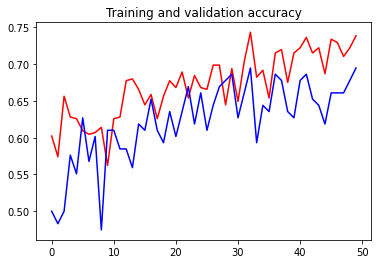

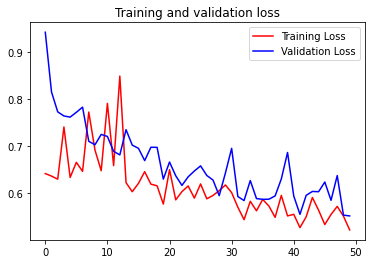

In [76]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
y_pred = model.predict_classes(test_generator)
y_pred = np.argmax(y_pred,axis=1)
y_true = test_generator.classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        98
           1       0.00      0.00      0.00       105

    accuracy                           0.48       203
   macro avg       0.24      0.50      0.33       203
weighted avg       0.23      0.48      0.31       203



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
